In [26]:
from sklearn.metrics import roc_curve,auc,roc_auc_score
import torch
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle


In [3]:
y_gt = torch.load('/mnt/data_lab513/dhsang/output/trial_18/evaluate/fold_0_gt.pt')
y_pred = torch.load('/mnt/data_lab513/dhsang/output/trial_18/evaluate/fold_0_pred.pt')
y_gt = y_gt[18]
y_pred = y_pred[18]

y_gt = torch.nn.functional.one_hot(y_gt,num_classes=9).float()

y_gt = y_gt.cpu().detach().numpy()
y_pred = y_pred.cpu().detach().numpy()

In [7]:
y_test = y_gt
y_score = y_pred

In [5]:
fpr = dict()
tpr = dict()
local_roc_auc = dict()

In [6]:
N_classes = 9

In [9]:
for i in range(N_classes):
    fpr[i], tpr[i], _ = roc_curve(np.array(y_test[:, i]),np.array(y_score[:, i]))
    local_roc_auc[i] = auc(fpr[i], tpr[i])

In [11]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
local_roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

In [12]:
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(N_classes)]))

In [15]:
# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(N_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])


In [16]:
# Finally average it and compute AUC
mean_tpr /= N_classes

In [17]:
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
local_roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

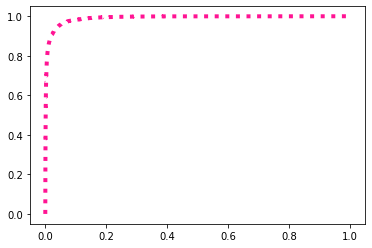

In [19]:
# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(local_roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)

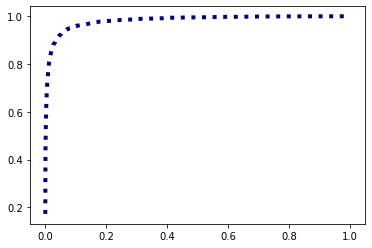

In [20]:
plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(local_roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)

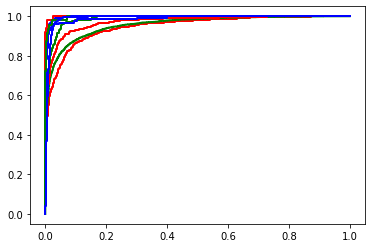

In [31]:
colors = cycle(['red', 'green', 'blue'])
for i, color in zip(range(N_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(i, local_roc_auc[i]))

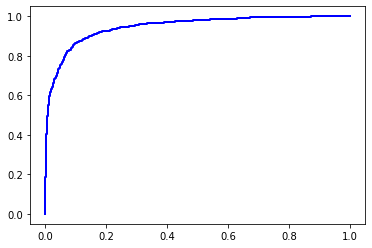

In [41]:
plt.plot(fpr[0], tpr[0], color='blue', lw=2,
                label='ROC curve of class {0} (area = {1:0.2f})'.format(0, local_roc_auc[0]))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


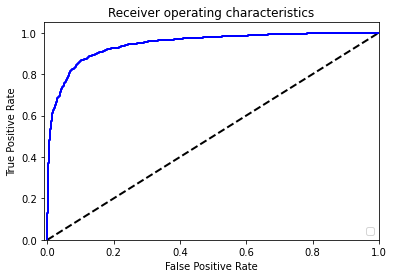

In [38]:
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-1e-2, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-Curve')
plt.legend(loc="lower right")






plt.show()

In [ ]:
# for i in range(N_classes):
#     fpr[i], tpr[i], _ = roc_curve(np.array(y_test[:, i]),np.array(y_score[:, i]))
#     local_roc_auc[i] = auc(fpr[i], tpr[i])

/home/dhsang/miniconda3/envs/thesis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


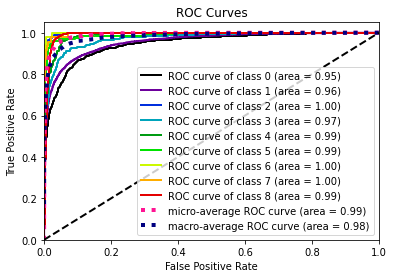

In [47]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = y_gt.argmax(1)
y_probas = y_pred
skplt.metrics.plot_roc_curve(y_true, y_probas,curves="each_class")
plt.show()

/home/dhsang/miniconda3/envs/thesis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; This will be removed in v0.4.0. Please use scikitplot.metrics.plot_confusion_matrix instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

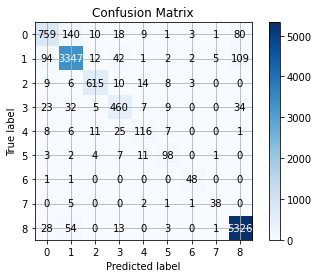

In [53]:
import scikitplot
scikitplot.plotters.plot_confusion_matrix(y_true, y_pred, normalize=False)